In [1]:
%pip install fastbook

Note: you may need to restart the kernel to use updated packages.


In [2]:
from fastbook import *
from fastcore.all import *

In [3]:
path = 'satellite_data'

In [4]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=10),
    get_y = parent_label,
    item_tfms=[Resize(256, method='crop')]
).dataloaders(path, bs=32)

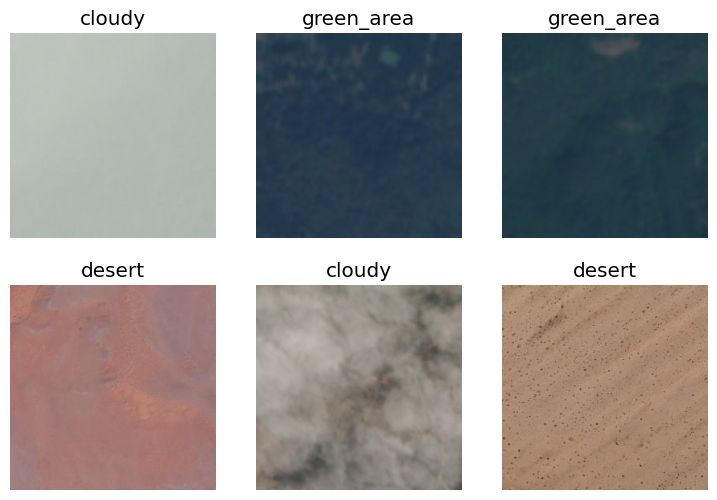

In [5]:
dls.show_batch(max_n=6)

In [6]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.922437,0.940048,0.550000,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.349704,0.661204,0.775000,00:03
1,0.195085,0.324481,0.875000,00:02
2,0.130933,0.143523,0.975000,00:02


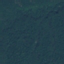

In [7]:
test_image = Image.open(f'{path}/green_area/Forest_2.jpg').to_thumb(256, 256)
test_image

In [8]:
label, _, probs = learn.predict(test_image)

print(label, _, probs)

green_area tensor(2) tensor([4.2443e-04, 9.2948e-04, 9.9694e-01, 1.7095e-03])


In [9]:
print(f"Confidence in this image being a {label}: {probs.max() * 100}%")

Confidence in this image being a green_area: 99.69365692138672%


In [10]:
learn.export('model.pkl')